# Project: The Movie DataBase

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset comes from the [Kaggle](https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata) website but it's originally from [IMDB](https://datasets.imdbws.com/) (Internet Movie Database). I choose this dataset because my brothers are actually filmmakers too and it could be interesting to discover the recipe for success. The dataset contains 21 columns (features) and 10866 rows (observations or films). The original files contain JSON objects. A JSON object is a kind of dictionary. This is a list of values and their keys. But in the given file these JSON objects are transformed into simple values with "|" symbol to separate the values. 
After a quick analysis of the data frame and its features, it became clear that I want to create a variable representing the "profit". The best way is to subtract "revenue" from "budget". I could also use the variable "popularity" but as an economist, I prefer this way of doing it. These 2 variables are correlated. If a movie becomes more popular, the revenue will increase and so will the profit. 
I'll directly get rid of the columns "revenue" and "budget" because the inflation adjustments are more relevant.  
__dependant variable:__ "profit" = "revenue" - " budget"  
__independent variables:__ "budget", "director", "runtime", "genres", "release_date", "vote_average", "release_year"  
I choose to answer the following questions:
- Wich features are positively correlated with profit?
- Is the "runtime" on "profit" following a normal shape (people don't like too long or too short movies)?
- What's the best "runtime"?


I'll try to answer those questions in this notebook. I hope you find it interesting and have fun reading my work.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("darkgrid")
import numpy as np

In [2]:
#can be usefull to see one time a whole value
#          pd.set_option('display.max_colwidth', None)
#I want to get rid of the scientific notation
pd.set_option('display.float_format', lambda x: '%.5f' % x)

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [3]:
#read the file
df = pd.read_csv("tmdb-movies.csv")

In [4]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.98576,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50000,2015,137999939.28003,1392445892.52380
1,76341,tt1392190,28.41994,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10000,2015,137999939.28003,348161292.48903
2,262500,tt2908446,13.11251,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30000,2015,101199955.47202,271619025.40763
3,140607,tt2488496,11.17310,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50000,2015,183999919.04004,1902723129.80182
4,168259,tt2820852,9.33501,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30000,2015,174799923.08803,1385748801.47052


In [5]:
#usefull for the introduction
df.shape

(10866, 21)

In [6]:
#I know that drop useless column should be in the Data
#cleaning part but I think it's more inteligent to do it
#early to avoid cleaning data that you'll then drop
df.drop(['imdb_id', 'cast', 'homepage', 'tagline',
         'overview', 'production_companies', 'vote_count', 
         'budget', 'revenue','keywords'
        ], axis=1, inplace=True)

In [7]:
df.head()

,id,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.98576,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,6.50000,2015,137999939.28003,1392445892.52380
1,76341,28.41994,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,7.10000,2015,137999939.28003,348161292.48903
2,262500,13.11251,Insurgent,Robert Schwentke,119,Adventure|Science Fiction|Thriller,3/18/15,6.30000,2015,101199955.47202,271619025.40763
3,140607,11.17310,Star Wars: The Force Awakens,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,7.50000,2015,183999919.04004,1902723129.80182
4,168259,9.33501,Furious 7,James Wan,137,Action|Crime|Thriller,4/1/15,7.30000,2015,174799923.08803,1385748801.47052


In [8]:
#I'll create an user defined function that show the types
#and even if it's an object
#x is the name of the dataframe
def type_(x):
    for i in x.columns:
        typeOfValue = type(x[i][0])
        print(i,":", typeOfValue)
type_(df)

id : <class 'numpy.int64'>
popularity : <class 'numpy.float64'>
original_title : <class 'str'>
director : <class 'str'>
runtime : <class 'numpy.int64'>
genres : <class 'str'>
release_date : <class 'str'>
vote_average : <class 'numpy.float64'>
release_year : <class 'numpy.int64'>
budget_adj : <class 'numpy.float64'>
revenue_adj : <class 'numpy.float64'>


In [9]:
df.info()
#we can see that there is missing values for "director"
#and for "genres"

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              10866 non-null  int64  
 1   popularity      10866 non-null  float64
 2   original_title  10866 non-null  object 
 3   director        10822 non-null  object 
 4   runtime         10866 non-null  int64  
 5   genres          10843 non-null  object 
 6   release_date    10866 non-null  object 
 7   vote_average    10866 non-null  float64
 8   release_year    10866 non-null  int64  
 9   budget_adj      10866 non-null  float64
 10  revenue_adj     10866 non-null  float64
dtypes: float64(4), int64(3), object(4)
memory usage: 933.9+ KB


In [10]:
df.director.isnull().sum(), df.genres.isnull().sum()

(44, 23)

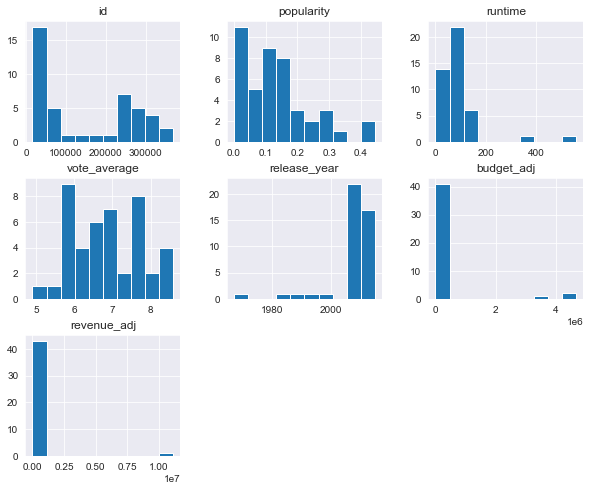

In [11]:
df[df.director.isnull()].hist(figsize=(10,8));
#we can see that the observations with missing data
#have a small "patern" (mostyl unpopular, short, recent,
# small budget and revenu) so it could create a biais 
#to dropp them

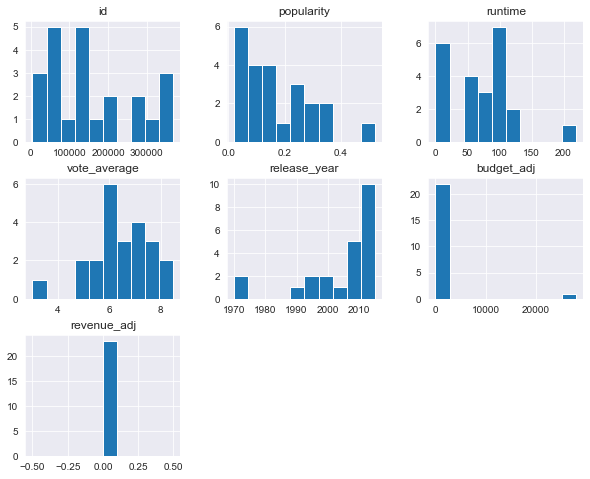

In [12]:
df[df.genres.isnull()].hist(figsize=(10,8));
#we can see that the observations with missing data
#have a small "patern" (mostyl unpopular, short/middle, 
#recent and small budget) so it could create a 
#biais to dropp them

In [13]:
a = df.isnull().sum() /df.shape[0]
a
#as we can see dropping the null values could won't do 
#so much damage because it represents only (in the 
#worst case) 0.7% of the data but to be sure we'll 
#replace by "unknow" value

id               0.00000
popularity       0.00000
original_title   0.00000
director         0.00405
runtime          0.00000
genres           0.00212
release_date     0.00000
vote_average     0.00000
release_year     0.00000
budget_adj       0.00000
revenue_adj      0.00000
dtype: float64

In [14]:
#we'll now investigate for duplicates
sum(df.duplicated())

1

In [15]:
#diplay the duplicates
df[df.duplicated(['id'], keep=False)]

,id,popularity,original_title,director,runtime,genres,release_date,vote_average,release_year,budget_adj,revenue_adj
2089,42194,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,5.00000,2010,30000000.00000,967000.00000
2090,42194,0.59643,TEKKEN,Dwight H. Little,92,Crime|Drama|Action|Thriller|Science Fiction,3/20/10,5.00000,2010,30000000.00000,967000.00000


### Data Cleaning 
Now that I discovered some problems with the data fram, I'll try to solve it in this section

In [16]:
#I'll rename the column's name but first I'll check the 
#actual name to copy, paste and modify it
df.columns

Index(['id', 'popularity', 'original_title', 'director', 'runtime', 'genres',
       'release_date', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [17]:
df.rename(columns={'original_title': 'title', 
                      'release_date': 'date',
                      'vote_average': 'vote',
                      'release_year': 'year',
                      'budget_adj': 'budget',
                      'revenue_adj': 'revenue',
                     }, inplace=True)

In [18]:
#I'll now resolve the problem of the type of date
#string (month/day/year) -> datetime (year-month-day)
df['date'] = pd.to_datetime(df['date'])
#to control
type_(df)

id : <class 'numpy.int64'>
popularity : <class 'numpy.float64'>
title : <class 'str'>
director : <class 'str'>
runtime : <class 'numpy.int64'>
genres : <class 'str'>
date : <class 'pandas._libs.tslibs.timestamps.Timestamp'>
vote : <class 'numpy.float64'>
year : <class 'numpy.int64'>
budget : <class 'numpy.float64'>
revenue : <class 'numpy.float64'>


In [19]:
#I would like replace the Nan value by the mean of
#their feature but I cant because it's categorical value
#I decide do replace them by "unknown"
df = df.fillna("unknown")

In [20]:
#controll if it worked
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   id          10866 non-null  int64         
 1   popularity  10866 non-null  float64       
 2   title       10866 non-null  object        
 3   director    10866 non-null  object        
 4   runtime     10866 non-null  int64         
 5   genres      10866 non-null  object        
 6   date        10866 non-null  datetime64[ns]
 7   vote        10866 non-null  float64       
 8   year        10866 non-null  int64         
 9   budget      10866 non-null  float64       
 10  revenue     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(3), object(3)
memory usage: 933.9+ KB


In [21]:
#to deal with duplicated I can only drop them
df.drop_duplicates(inplace = True)

In [22]:
#control
sum(df.duplicated())

0

In [23]:
df.describe()
#we can see that some value are 0 and it's not possible
#to have 0 runtime 0 budget or 0 revenue
#it's clearly Nan values
#we'll further investigate this

,id,popularity,runtime,vote,year,budget,revenue
count,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000
mean,66066.37441,0.64645,102.07179,5.97501,2001.32186,17549894.03732,51369001.75884
std,92134.09197,1.00023,31.38270,0.93514,12.81326,34307526.65836,144638333.12899
min,5.00000,0.00007,0.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.00000,0.20758,90.00000,5.40000,1995.00000,0.00000,0.00000
50%,20662.00000,0.38383,99.00000,6.00000,2006.00000,0.00000,0.00000
75%,75612.00000,0.71386,111.00000,6.60000,2011.00000,20853251.08440,33701729.00946
max,417859.00000,32.98576,900.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


In [24]:
#first I don't know why but it's in decimal let's modify that
df["popularity"] = df["popularity"] * 1000000
df.describe()

,id,popularity,runtime,vote,year,budget,revenue
count,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000,10865.00000
mean,66066.37441,646445.55490,102.07179,5.97501,2001.32186,17549894.03732,51369001.75884
std,92134.09197,1000230.85023,31.38270,0.93514,12.81326,34307526.65836,144638333.12899
min,5.00000,65.00000,0.00000,1.50000,1960.00000,0.00000,0.00000
25%,10596.00000,207575.00000,90.00000,5.40000,1995.00000,0.00000,0.00000
50%,20662.00000,383831.00000,99.00000,6.00000,2006.00000,0.00000,0.00000
75%,75612.00000,713857.00000,111.00000,6.60000,2011.00000,20853251.08440,33701729.00946
max,417859.00000,32985763.00000,900.00000,9.20000,2015.00000,425000000.00000,2827123750.41189


In [25]:
dfr = df.query("runtime < 1" and "budget <1" and "revenue <1")
dfr.count()
#there is 6016 "dirty" values

id            6016
popularity    6016
title         6016
director      6016
runtime       6016
genres        6016
date          6016
vote          6016
year          6016
budget        6016
revenue       6016
dtype: int64

In [26]:
#that's a lot of values
print(dfr.count()[1]/df.shape[0])

0.5537045559134837


In [ ]:
#I'll replace it by the mean
mean1 = df["runtime"].mean()
df.loc[df["runtime"] < 1, "runtime"] = mean1
mean1 = df["budget"].mean()
df.loc[df["budget"] < 1, "budget"] = mean1
mean1 = df["revenue"].mean()
df.loc[df["revenue"] < 1, "revenue"] = mean1

In [ ]:
#control
dfr = df.query("runtime < 1" and "budget <1" and "revenue <1")
dfr.count()

In [ ]:
df.describe()

In [ ]:
#short film and small revenue are possible but a budget 
#under 1000$ should be an error
dfr = df.query("budget <1000")
dfr.count()


In [ ]:
#it's only 56 observations so let's drop them
df.drop(df[df['budget'] < 1000].index, inplace = True)

In [ ]:
#the last step is specific is create the feature "profit"
df["profit"]= df["revenue"] - df["budget"]

In [ ]:
type("profit")

In [ ]:
df.info()

<a id='eda'></a>
## Exploratory Data Analysis
### Wich features are positively correlated with profit?

In [ ]:
#this question is easy to answer it makes to do it first
pd.plotting.scatter_matrix(df, figsize = (15,15));

In [ ]:
#vizualy we can direct see that the following features
#are corelated with "profit":
#"revenue", "popularity", "vote", "year" and "budget"

In [ ]:
#let's prove it by calculating the Pearson coefficient
#(measure the correlation between 2 variables)
a = ["profit", "revenue", "popularity", "vote", "year","budget"]
for i in a:
    print(i, ": ", df['profit'].corr(df[i]))


In [ ]:
#to answer the question we can say that the most positively
#correlated features with "profit" are:
#popularity, budget and vote
b = ["Popularity", "Budget", "Vote"]
c = [0.5323925588531359,  0.42893559310958795, 0.1744859753046028]
plt.title("Pearson coefficient between Profit the following features")
plt.bar(b,c);

### Is the "runtime" on "profit" following a normal shape?

In [ ]:
#due to the presence of series the runtime can be pretty
#long so it makes more sense to limit the X axis
plt.scatter(df["runtime"], df["profit"],  
            marker="o", color ="green")
plt.xlim([0,200])
plt.title('Runtime on profit')
plt.xlabel('Runtime')
plt.ylabel('Profit');

In [ ]:
#the answer is yes because the most profitable
#movie are concentrated in the middle of the x-axis

### What's the best "runtime"?


In [ ]:
df.head(1)

In [ ]:
#to answer that we must edge and cut runtime
#there is too much possibilies
df1 = df
df1.runtime =df1.runtime.round(-1)
df1.head(1)

In [ ]:
a = df.groupby('runtime')['profit'].mean()
a.plot();

In [ ]:
#we can see that the movie with the best profit mean
#have a runtime of 200mn.

<a id='conclusions'></a>
## Conclusions


I tried to answer these questions to the best of my abilities and my knowledge. I spent a lot of time cleaning the data but it was very informative.  
To summarize the most correlated (no causality effect) feature is “popularity”. It’s very logical because it directly impacts the number of entries and so the “revenue”. The fact that a bigger “budget” implies a bigger “profit” is particularly interesting. It was also a surprise to discover that the “profit” isn’t increasing over time.  
For the second question, the theory that people don't like too short or long movie, seems to be true. 
With the last question I deepen the subject and come to the conclusion that the movie with a "runtime" of 200 have the best mean "profit".  
If I wanted to deepen the subject I could also answer the following questions:
- What "genre" has the best "profit" in mean?
- Is a seasonal factor impacting the profit ("release_year")?
- Who is the director who makes the most money?

With the help of machine learning technics or linear regression, we could try to predict the hypothetical success of a movie based on some features.

### Limitations
Regarding the limitations, I would like to mention the fact that many features are mechanically correlated with each other. For example, it’s normal that “profit” is correlated with “popularity” because the “profit” is a function of the “revenue” that depends on the “popularity” (numbers of sales). In my opinion that could be a problem for more advanced analysis.  
Another limitation is that I can’t prove any causal relation with the tool I used. The same goes for the prediction.  
If I tried to do some analyses with the feature “genres” a lot of cleaning would have been needed. I should have tried to split the value with the help of a REGEX function.  
Regarding the data, the size is very large so it isn’t a problem (10000 observations) but there were a lot of missing values (0 as value).




N/A